### Data Preparation for Crashes Dataset

In [1]:
# loading libraries and reading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from functools import reduce
import seaborn as sns

# Display Options
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

# read as object to avoid that pandas does any smart type conversion
# because want to store sample data in exactly the same format as original data
crashes = pd.read_csv("/Users/sunghill/Downloads/Traffic_Crashes_-_Crashes.csv", dtype=object)
# vehicles = pd.read_csv("Users/sunghill/Downloads/crashes_sample/vehicles.csv", dtype=object)
# people = pd.read_csv("Users/sunghill/Downloads/crashes_sample/people.csv", dtype=object)

# keep only crashes from October 2017
dates_parsed = pd.to_datetime(crashes["CRASH_DATE"])
crashes = crashes[dates_parsed >= pd.to_datetime("2017-10-01")]

print(crashes.shape)
# get 10% sample of crashes
in_sample = np.random.rand(len(crashes)) < 0.1
crashes_sample = crashes[in_sample]

# get associated vehicles and people
included_rd_nos = set(crashes_sample["RD_NO"])
# vehicles_sample = vehicles[vehicles["RD_NO"].apply(lambda r: r in included_rd_nos)]
# people_sample = people[people["RD_NO"].apply(lambda r: r in included_rd_nos)]

# store
crashes_sample.to_csv("crashes.sample.csv", index=False)
# vehicles_sample.to_csv("vehicles.sample.csv", index=False)
# people_sample.to_csv("people.sample.csv", index=False)

crashes_sample.shape

(255439, 48)


(25548, 48)

### Check for the structure of the data frame

In [2]:
#data frame info
print(crashes_sample.shape)
print(crashes_sample.info(verbose= True, null_counts=True))

(25548, 48)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 1 to 363786
Data columns (total 48 columns):
RD_NO                            25548 non-null object
CRASH_DATE_EST_I                 1704 non-null object
CRASH_DATE                       25548 non-null object
POSTED_SPEED_LIMIT               25548 non-null object
TRAFFIC_CONTROL_DEVICE           25548 non-null object
DEVICE_CONDITION                 25548 non-null object
WEATHER_CONDITION                25548 non-null object
LIGHTING_CONDITION               25548 non-null object
FIRST_CRASH_TYPE                 25548 non-null object
TRAFFICWAY_TYPE                  25548 non-null object
LANE_CNT                         11177 non-null object
ALIGNMENT                        25548 non-null object
ROADWAY_SURFACE_COND             25548 non-null object
ROAD_DEFECT                      25548 non-null object
REPORT_TYPE                      24913 non-null object
CRASH_TYPE                       25548 non-null object

### Data Quality Check and identifying missing values
The dataframe information above gives us a hint that a of lot of columns in the dataframe have missing values. We will use isnull() to identify missing values.
While handling missing data, identify rows and columns containing missing values and then decide how to impute/treat missing values in each column separately. 

In [3]:
# percentage of missing value in each column
round(100*(crashes_sample.isnull().sum()/len(crashes_sample.index)), 2).sort_values(ascending=False)

WORKERS_PRESENT_I                99.84
DOORING_I                        99.62
WORK_ZONE_TYPE                   99.54
WORK_ZONE_I                      99.41
PHOTOS_TAKEN_I                   98.93
STATEMENTS_TAKEN_I               97.80
NOT_RIGHT_OF_WAY_I               95.47
CRASH_DATE_EST_I                 93.33
INTERSECTION_RELATED_I           77.00
HIT_AND_RUN_I                    72.44
LANE_CNT                         56.25
REPORT_TYPE                       2.49
INJURIES_TOTAL                    0.79
MOST_SEVERE_INJURY                0.79
INJURIES_FATAL                    0.79
INJURIES_INCAPACITATING           0.79
INJURIES_NON_INCAPACITATING       0.79
INJURIES_REPORTED_NOT_EVIDENT     0.79
INJURIES_NO_INDICATION            0.79
INJURIES_UNKNOWN                  0.79
NUM_UNITS                         0.57
LATITUDE                          0.49
LONGITUDE                         0.49
LOCATION                          0.49
DEVICE_CONDITION                  0.00
LIGHTING_CONDITION       

Let's drop columns from the data frame with more than 50% percentage of missing values

In [4]:
# check the columns to removed for more than 50 percent missing values
columns_remove = round(100*(crashes_sample.isnull().sum()/len(crashes_sample.index)), 2)>50
columns_remove_lt = [x for x in columns_remove[columns_remove==True].index.tolist()]

# remove the columns
crashes_sample.drop(columns = columns_remove_lt, axis=1, inplace=True)

#check the remaining columns and sort by percentage
round(100*(crashes_sample.isnull().sum()/len(crashes_sample.index)), 2).sort_values(ascending=False)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


REPORT_TYPE                      2.49
INJURIES_TOTAL                   0.79
INJURIES_FATAL                   0.79
MOST_SEVERE_INJURY               0.79
INJURIES_UNKNOWN                 0.79
INJURIES_NO_INDICATION           0.79
INJURIES_REPORTED_NOT_EVIDENT    0.79
INJURIES_NON_INCAPACITATING      0.79
INJURIES_INCAPACITATING          0.79
NUM_UNITS                        0.57
LONGITUDE                        0.49
LOCATION                         0.49
LATITUDE                         0.49
TRAFFIC_CONTROL_DEVICE           0.00
POSTED_SPEED_LIMIT               0.00
CRASH_DATE                       0.00
DEVICE_CONDITION                 0.00
WEATHER_CONDITION                0.00
LIGHTING_CONDITION               0.00
FIRST_CRASH_TYPE                 0.00
TRAFFICWAY_TYPE                  0.00
ALIGNMENT                        0.00
ROADWAY_SURFACE_COND             0.00
ROAD_DEFECT                      0.00
STREET_NO                        0.00
CRASH_TYPE                       0.00
DAMAGE      

### Feature Selection and changing of the datatypes


In [5]:
crashes_sample.describe()
crashes_sample.shape

(25548, 37)

In [6]:
# some of the rows has high missing value so we drop NAN 
modified_data = crashes_sample.dropna(how='any', inplace = False)
    
print(modified_data.shape)

(24644, 37)


In [7]:
modified_data.head(10)

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
15,JC414637,08/31/2019 11:10:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,0,0,1,0,11,7,8,41.926010473,-87.76956312,POINT (-87.769563119878 41.92601047334)
43,JC414795,08/31/2019 12:37:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0,0,2,0,12,7,8,41.997778465,-87.693485501,POINT (-87.693485501093 41.997778465054)
47,JC412603,08/29/2019 12:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,0,0,2,0,12,5,8,41.91361325,-87.685819559,POINT (-87.685819558506 41.913613249987)
49,JC415441,09/01/2019 12:15:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0,0,5,0,0,1,9,41.876738958,-87.74448576,POINT (-87.744485760382 41.876738957854)
51,JC415472,09/01/2019 12:45:00 AM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0,3,3,0,0,1,9,41.771557757,-87.717798696,POINT (-87.717798696372 41.771557756749)
61,JC414912,08/31/2019 02:30:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,0,0,3,0,14,7,8,41.810582424,-87.693198675,POINT (-87.693198674593 41.810582424487)
64,JC415088,08/31/2019 06:03:00 PM,35,NO CONTROLS,OTHER,RAIN,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0,0,2,0,18,7,8,41.759999109,-87.683270707,POINT (-87.683270706832 41.759999108546)
84,JC403286,08/22/2019 09:00:00 PM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DARKNESS,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,0,0,2,0,21,5,8,41.891295421,-87.647527875,POINT (-87.647527874697 41.891295420894)
95,JC410647,08/19/2019 10:00:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING IMPROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,...,0,0,2,0,10,2,8,41.867330511,-87.62756602,POINT (-87.62756601972 41.867330510881)
104,JC414612,08/30/2019 01:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0,0,2,0,13,6,8,41.848641365,-87.675794204,POINT (-87.675794203793 41.848641365373)


In [8]:
# unique counts in all columns of the data set
unique_counts = pd.DataFrame.from_records([(col, modified_data[col].nunique()) for col in modified_data.columns],
                                          columns=['Column_Name', 'Unique_Count']).sort_values(by=['Unique_Count'])
unique_counts

,Column_Name,Unique_Count
30,INJURIES_UNKNOWN,1
12,REPORT_TYPE,2
13,CRASH_TYPE,2
25,INJURIES_FATAL,2
14,DAMAGE,3
19,STREET_DIRECTION,4
23,MOST_SEVERE_INJURY,5
6,LIGHTING_CONDITION,6
26,INJURIES_INCAPACITATING,6
9,ALIGNMENT,6


In [9]:
#Changing the datatypes

convert_dict = {'RD_NO': str,'CRASH_DATE':str, 'POSTED_SPEED_LIMIT': int, 'DEVICE_CONDITION': 'category', 
                'WEATHER_CONDITION': 'category', 'LIGHTING_CONDITION':'category', 'DAMAGE':'category','ROADWAY_SURFACE_COND':'category','ROAD_DEFECT': 'category',
                'REPORT_TYPE': 'category','CRASH_TYPE': 'category', 'MOST_SEVERE_INJURY': 'category', 'ALIGNMENT': 'category','TRAFFIC_CONTROL_DEVICE': 
                'category','FIRST_CRASH_TYPE': 'category','TRAFFICWAY_TYPE': 'category', 'PRIM_CONTRIBUTORY_CAUSE': 'category',
                'BEAT_OF_OCCURRENCE': int, 'CRASH_HOUR': int, 'DATE_POLICE_NOTIFIED': str, 'SEC_CONTRIBUTORY_CAUSE': 'category', 
                'STREET_NO': str, 'STREET_DIRECTION': str, 'STREET_NAME': str, 'NUM_UNITS': 'category', 'INJURIES_TOTAL': 'category',
                'INJURIES_FATAL': 'category', 'INJURIES_INCAPACITATING': 'category', 'INJURIES_NON_INCAPACITATING': 'category', 
                'INJURIES_REPORTED_NOT_EVIDENT': 'category', 'INJURIES_NO_INDICATION':'category', 'CRASH_DAY_OF_WEEK':'category',
                'CRASH_MONTH': int, 'LATITUDE':float, 'LONGITUDE': float, 'LOCATION': str
               } 
  
crashes_data_analysis_clean = modified_data.astype(convert_dict) 
print(crashes_data_analysis_clean.dtypes) 

crashes_data_analysis_clean.shape

RD_NO                              object
CRASH_DATE                         object
POSTED_SPEED_LIMIT                  int64
TRAFFIC_CONTROL_DEVICE           category
DEVICE_CONDITION                 category
WEATHER_CONDITION                category
LIGHTING_CONDITION               category
FIRST_CRASH_TYPE                 category
TRAFFICWAY_TYPE                  category
ALIGNMENT                        category
ROADWAY_SURFACE_COND             category
ROAD_DEFECT                      category
REPORT_TYPE                      category
CRASH_TYPE                       category
DAMAGE                           category
DATE_POLICE_NOTIFIED               object
PRIM_CONTRIBUTORY_CAUSE          category
SEC_CONTRIBUTORY_CAUSE           category
STREET_NO                          object
STREET_DIRECTION                   object
STREET_NAME                        object
BEAT_OF_OCCURRENCE                  int64
NUM_UNITS                        category
MOST_SEVERE_INJURY               c

(24644, 37)

In [10]:
for col in crashes_data_analysis_clean.select_dtypes('category'):
    crashes_data_analysis_clean.select_dtypes('category').replace(crashes_data_analysis_clean.select_dtypes('category')[col].value_counts()>3, "OTHERS")



In [11]:
for col in crashes_data_analysis_clean:
    print(crashes_data_analysis_clean[col].value_counts().nlargest(3))

JB177624    1
JB279060    1
JB478233    1
Name: RD_NO, dtype: int64
07/28/2019 04:00:00 PM    5
09/15/2018 07:30:00 PM    4
06/21/2019 04:00:00 PM    4
Name: CRASH_DATE, dtype: int64
30    18327
35     1687
25     1491
Name: POSTED_SPEED_LIMIT, dtype: int64
NO CONTROLS          14122
TRAFFIC SIGNAL        6850
STOP SIGN/FLASHER     2503
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64
NO CONTROLS             14244
FUNCTIONING PROPERLY     8626
UNKNOWN                  1346
Name: DEVICE_CONDITION, dtype: int64
CLEAR    19115
RAIN      2494
SNOW      1052
Name: WEATHER_CONDITION, dtype: int64
DAYLIGHT                  16074
DARKNESS, LIGHTED ROAD     5363
DARKNESS                   1232
Name: LIGHTING_CONDITION, dtype: int64
REAR END                    5834
PARKED MOTOR VEHICLE        5386
SIDESWIPE SAME DIRECTION    3857
Name: FIRST_CRASH_TYPE, dtype: int64
NOT DIVIDED                        11305
DIVIDED - W/MEDIAN (NOT RAISED)     4556
ONE-WAY                             3175
Name: TRAFFICW

### Creating dummy variable for categories

In [12]:
dummy = pd.get_dummies(crashes_data_analysis_clean[['TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION','WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'POSTED_SPEED_LIMIT']])

dummy.shape

(24644, 183)

### Data set to be merged with created dummy variable

In [13]:
required_data = crashes_data_analysis_clean[['RD_NO', 'CRASH_DAY_OF_WEEK','CRASH_MONTH', 'CRASH_TYPE']]

required_data.head(10)


,RD_NO,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_TYPE
15,JC414637,7,8,NO INJURY / DRIVE AWAY
43,JC414795,7,8,NO INJURY / DRIVE AWAY
47,JC412603,5,8,NO INJURY / DRIVE AWAY
49,JC415441,1,9,NO INJURY / DRIVE AWAY
51,JC415472,1,9,INJURY AND / OR TOW DUE TO CRASH
61,JC414912,7,8,NO INJURY / DRIVE AWAY
64,JC415088,7,8,INJURY AND / OR TOW DUE TO CRASH
84,JC403286,5,8,NO INJURY / DRIVE AWAY
95,JC410647,2,8,NO INJURY / DRIVE AWAY
104,JC414612,6,8,NO INJURY / DRIVE AWAY


### Merging the previously existed Variable  with the created dummy variables

In [14]:
merged_data = pd.concat([required_data, dummy], axis =1)

merged_data.dtypes

RD_NO                                                                                                        object
CRASH_DAY_OF_WEEK                                                                                          category
CRASH_MONTH                                                                                                   int64
CRASH_TYPE                                                                                                 category
POSTED_SPEED_LIMIT                                                                                            int64
TRAFFIC_CONTROL_DEVICE_BICYCLE CROSSING SIGN                                                                  uint8
TRAFFIC_CONTROL_DEVICE_DELINEATORS                                                                            uint8
TRAFFIC_CONTROL_DEVICE_FLASHING CONTROL SIGNAL                                                                uint8
TRAFFIC_CONTROL_DEVICE_LANE USE MARKING                                 

### check for the library require to install to do logistic regression

In [15]:

from sklearn.model_selection import train_test_split

### splitting the data set into test and train data. In this model we splitted the data in train and test as 75% and 25% repectively.


In [16]:
#Building the first model on Crashes DataSet


X = merged_data.drop(merged_data[['RD_NO','CRASH_TYPE']], axis =1)

y = merged_data['CRASH_TYPE']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### since the target variable we have is dichotomous so we applied logistic regression by calling logreg function from sklearn library of python

In [17]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
result = logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### confusion matrix
1) used to summary of prediction variable.
2) give us insight of the error made by the classifier and also the type of error



In [18]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 611,  984],
       [ 293, 4273]])

Text(0.5, 257.44, 'Predicted label')

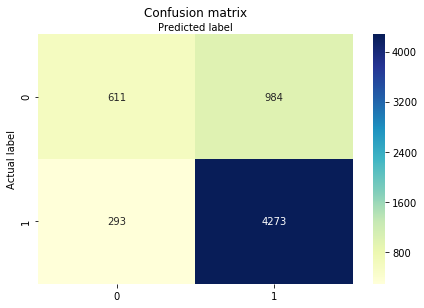

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Metrics of confusion matrix
there are various metrices to evaluate the performance of model like Accuracy,recall, precision and F-score.

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label="NO INJURY / DRIVE AWAY"))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label="NO INJURY / DRIVE AWAY"))
print("Classification:",metrics.classification_report(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred, pos_label="NO INJURY / DRIVE AWAY"))


Accuracy: 0.7927284531731862
Precision: 0.8128210005706676
Recall: 0.9358300481822164
Classification:                                   precision    recall  f1-score   support

INJURY AND / OR TOW DUE TO CRASH       0.68      0.38      0.49      1595
          NO INJURY / DRIVE AWAY       0.81      0.94      0.87      4566

                        accuracy                           0.79      6161
                       macro avg       0.74      0.66      0.68      6161
                    weighted avg       0.78      0.79      0.77      6161

0.8699989819810647


In [21]:
modified_data['CRASH_TYPE'].value_counts()

NO INJURY / DRIVE AWAY              18163
INJURY AND / OR TOW DUE TO CRASH     6538
Name: CRASH_TYPE, dtype: int64

### ROC curve

Each point  represents as pair of sensitivity and specificity particular to a specific decision threshold.
It tell us how much the model is able to distingusish between two classes.

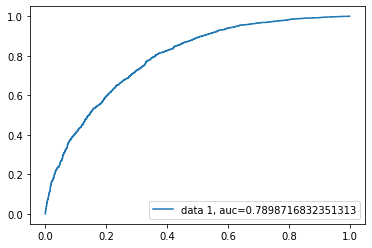

In [22]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label="NO INJURY / DRIVE AWAY")
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Automatically created module for IPython interactive environment


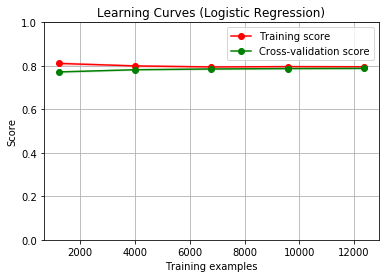

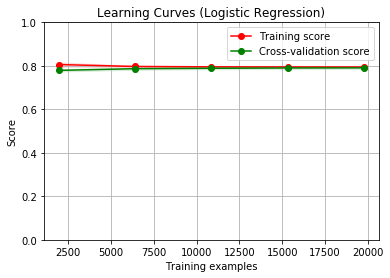

In [23]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



X, y = merged_data.drop(merged_data[['RD_NO','CRASH_TYPE']], axis =1), merged_data['CRASH_TYPE']


title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv2 = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
cv1 = KFold(2, True, 1)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0, 1.0), cv=cv1, n_jobs=4)
plot_learning_curve(estimator, title, X, y, ylim=(0, 1.0), cv=cv2, n_jobs=4)

plt.show()

In [24]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data

/usr/local/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [25]:
X1 = merged_data.drop(merged_data[['RD_NO','CRASH_TYPE']], axis =1)

y1 = merged_data['CRASH_TYPE']


X_train,X_test,y_train,y_test=train_test_split(X1,y1,random_state=0)

In [26]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# cnf_matrix_decision_gini = metrics.confusion_matrix(y_test, y_pred)
# cnf_matrix_decision_gini

In [27]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
clf_entropy.fit(X_train, y_train)

y_pred = clf_entropy.predict(X_test)

# cnf_matrix_decision_entropy = metrics.confusion_matrix(y_test, y_pred)
# cnf_matrix_decision_entropy

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf_random = RandomForestClassifier(max_depth=5, n_estimators=100)

clf_random.fit(X_train, y_train)

y_pred = clf_random.predict(X_test)


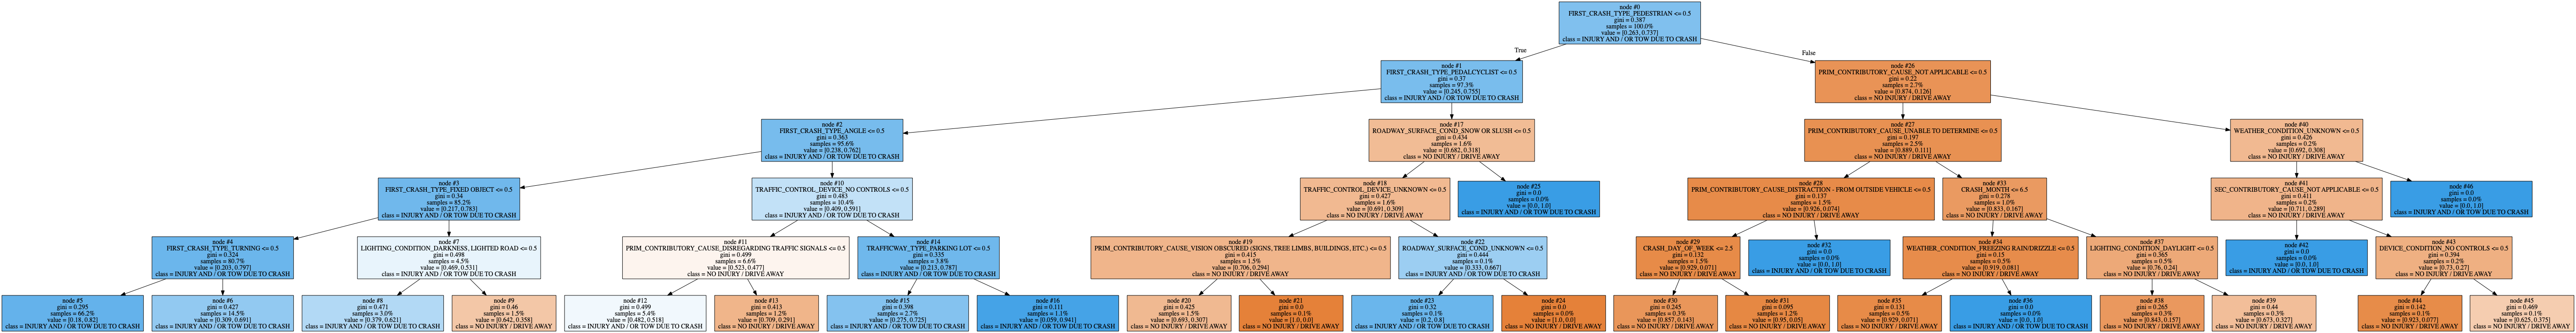

In [29]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled = True,node_ids = True, proportion = True, feature_names=merged_data.drop(merged_data[['RD_NO','CRASH_TYPE']], axis =1).columns, class_names = ['NO INJURY / DRIVE AWAY','INJURY AND / OR TOW DUE TO CRASH'])
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

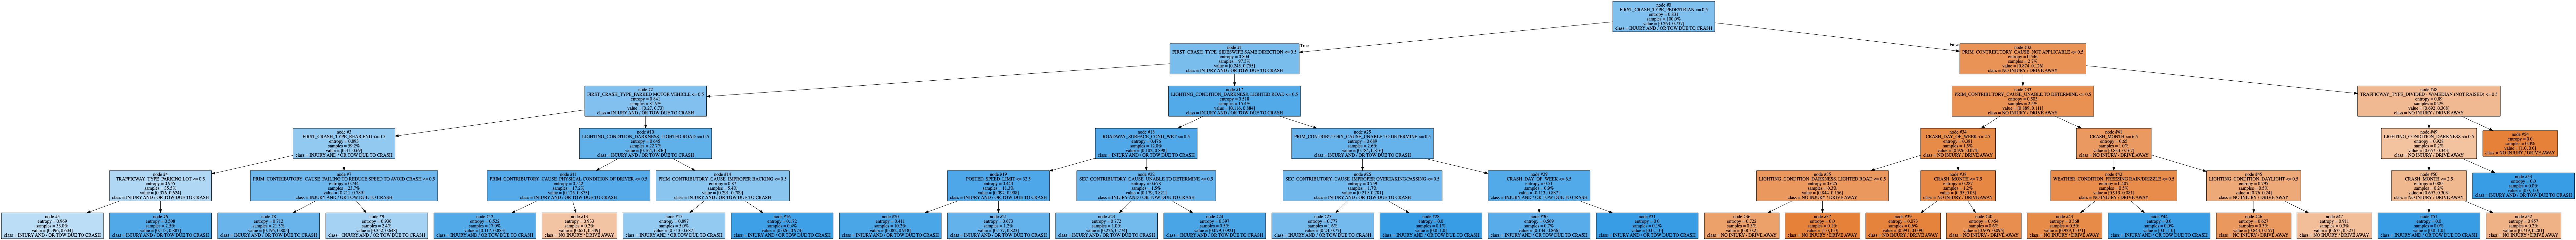

In [30]:
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data, filled = True,node_ids = True, proportion = True, feature_names=merged_data.drop(merged_data[['RD_NO','CRASH_TYPE']], axis =1).columns, class_names = ['NO INJURY / DRIVE AWAY','INJURY AND / OR TOW DUE TO CRASH'])
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

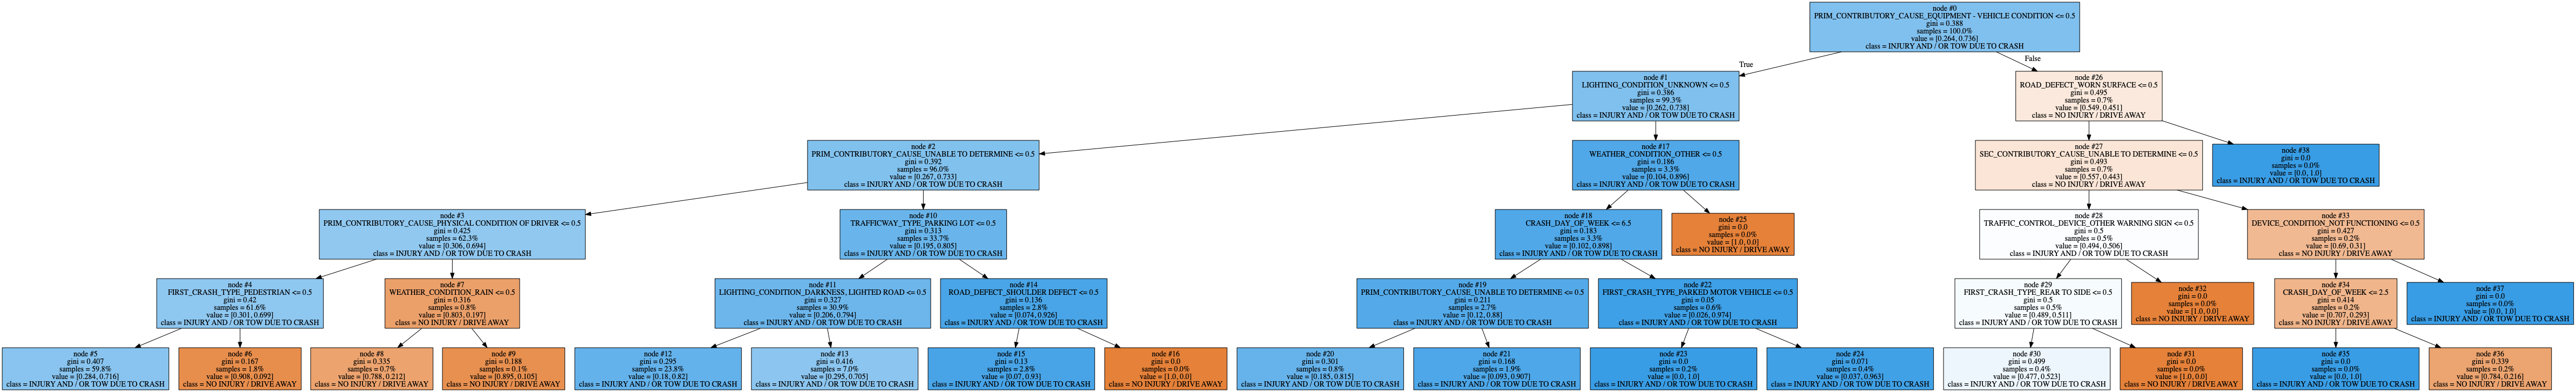

In [31]:
dot_data = StringIO()
export_graphviz(clf_random.estimators_[4], out_file=dot_data, filled = True,node_ids = True, proportion = True, feature_names=merged_data.drop(merged_data[['RD_NO','CRASH_TYPE']], axis =1).columns, class_names = ['NO INJURY / DRIVE AWAY','INJURY AND / OR TOW DUE TO CRASH'])
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [32]:
### Hyperparameterization_tuning of decision tree

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dt = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True,
                   verbose = 1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [ ]:
#### Tuning of max_depth


In [38]:
plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-38-ad39ac264f2c>, line 1)

In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True,
                   verbose = 1)
tree.fit(X_train, y_train)

In [ ]:
scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

In [ ]:
plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#### Tuning min_samples_leaf

In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True,
                   verbose = 1)
tree.fit(X_train, y_train)

In [ ]:
scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#### Tuning min_samples_split

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True,
                   verbose = 1)
tree.fit(X_train, y_train)

In [ ]:
scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

In [ ]:
print(grid_search.best_estimator_)

In [ ]:
# model with optimal hyperparameters
clf_gini2 = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini2.fit(X_train, y_train)

In [ ]:
# accuracy score
#print ('Accuracy Score for Decision Tree Final Model :',clf_gini2.score(X_test,y_test))

In [ ]:
dot_data = StringIO()
export_graphviz(clf_gini2, out_file=dot_data, filled = True,node_ids = True, proportion = True, feature_names=merged_data.drop(merged_data[['RD_NO','CRASH_TYPE']], axis =1).columns, class_names = ['NO INJURY / DRIVE AWAY','INJURY AND / OR TOW DUE TO CRASH'])
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())